Основы работы с conda

conda — это менеджер пакетов и окружений, который часто используется в Data Science и MLOps для управления зависимостями и изоляции проектов.

Если у тебя еще не установлен conda, ты можешь установить его, скачав Miniconda #[https://docs.conda.io/en/latest/miniconda.html] или Anaconda [https://www.anaconda.com/download].

## Основные команды conda
### 1. Создание нового окружения:
conda create --name test_env python=3.10
### 2. Активация окружения:
conda activate myenv
### 3. Деактивация окружения:
conda deactivate
### 4. Установка пакетов:
conda install numpy pandas
### 5. Удаление пакетов:
conda remove numpy
### 6. Экспорт окружения в файл:
conda env export > environment.yml

In [20]:
!uname -a

Linux Mishka-Fredde 6.11.0-19-generic #19~24.04.1-Ubuntu SMP PREEMPT_DYNAMIC Mon Feb 17 11:51:52 UTC 2 x86_64 x86_64 x86_64 GNU/Linux


In [21]:
#Пример получения списка установленный пакетов в системе и запись в файл list_libs.yml
!conda list > list_libs.yml

In [22]:
#Вывод списка библиотек из файла начинающихся на "n"
!cat list_libs.yml | grep '^n'

navigator-updater         0.5.1           py312h06a4308_0  
nb_conda_kernels          2.5.2           py312h06a4308_0  
nbclient                  0.8.0           py312h06a4308_0  
nbconvert                 7.16.4          py312h06a4308_0  
nbformat                  5.10.4          py312h06a4308_0  
ncurses                   6.4                  h6a678d5_0  
nest-asyncio              1.6.0           py312h06a4308_0  
networkx                  3.3             py312h06a4308_0  
nltk                      3.9.1           py312h06a4308_0  
notebook                  7.2.2           py312h06a4308_1  
notebook-shim             0.2.3           py312h06a4308_0  
nspr                      4.35                 h6a678d5_0  
nss                       3.89.1               h6a678d5_0  
numba                     0.60.0          py312h526ad5a_0  
numexpr                   2.8.7           py312hf827012_0  
numpy                     1.26.4          py312hc5e2394_0  
numpy-base                1.26.4        

## Основные команды pip

In [23]:
!pip list 

Package                           Version
--------------------------------- ------------------
aext-assistant                    4.1.0
aext-assistant-server             4.1.0
aext-core                         4.1.0
aext-core-server                  4.1.0
aext-panels                       4.1.0
aext-panels-server                4.1.0
aext-project-filebrowser-server   4.1.0
aext-share-notebook               4.1.0
aext-share-notebook-server        4.1.0
aext-shared                       4.1.0
aext-toolbox                      4.1.0
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.13.3
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-cli-base                 0.4.2
anaconda-client      

In [24]:
!pip show apache-airflow

In [25]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          43 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   16
  On-line CPU(s) list:    0-15
Vendor ID:                AuthenticAMD
  Model name:             AMD Ryzen 7 2700X Eight-Core Processor
    CPU family:           23
    Model:                8
    Thread(s) per core:   2
    Core(s) per socket:   8
    Socket(s):            1
    Stepping:             2
    Frequency boost:      enabled
    CPU(s) scaling MHz:   71%
    CPU max MHz:          3700.0000
    CPU min MHz:          2200.0000
    BogoMIPS:             7385.10
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge m
                          ca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall
                           nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep
                          _good nopl nonstop_tsc cpuid extd_apicid aperfmperf ra

### Библиотека Pytorch
PyTorch — это библиотека для машинного обучения, предназначенная для построения архитектур нейронных сетей и обучения.

In [26]:
import torch

In [27]:
a = torch.tensor([1.,2,3])
b = torch.tensor([3,-2,1])
c = a + b
c

tensor([4., 0., 4.])

In [28]:
torch.cuda.is_available()

False

In [29]:
a = torch.tensor([1.,2,3], requires_grad=True)
b = a + 2
c = a * a * 2
c = c.mean()
c.backward()  # Вычисляет градиенты
print(a.grad)

tensor([1.3333, 2.6667, 4.0000])


### Пример обучения нейронной сети для изображений

In [30]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

#Пример построения графа нейросети с полносвязнными слоями
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.proj = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.proj(x)  # (B, C, H, W) -> (B, embed_dim, H/patch_size, W/patch_size)
        x = x.flatten(2)  # (B, embed_dim, H/patch_size * W/patch_size)
        x = x.transpose(1, 2)  # (B, H/patch_size * W/patch_size, embed_dim)
        return x

class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert embed_dim % num_heads == 0

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        self.query_linear = nn.Linear(embed_dim, embed_dim)
        self.key_linear = nn.Linear(embed_dim, embed_dim)
        self.value_linear = nn.Linear(embed_dim, embed_dim)
        self.out_linear = nn.Linear(embed_dim, embed_dim)

    def attention(self, query, key, value, mask=None):
        scores = torch.matmul(query, key.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32))
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        attn = F.softmax(scores, dim=-1)
        context = torch.matmul(attn, value)
        return context, attn

    def forward(self, x):
        batch_size = x.size(0)

        query = self.query_linear(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        key = self.key_linear(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        value = self.value_linear(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        context, _ = self.attention(query, key, value)
        context = context.transpose(1, 2).contiguous().view(batch_size, -1, self.embed_dim)
        return self.out_linear(context)

class FeedForward(nn.Module):
    def __init__(self, embed_dim, hidden_dim, dropout=0.1):
        super(FeedForward, self).__init__()
        self.linear1 = nn.Linear(embed_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(hidden_dim, embed_dim)

    def forward(self, x):
        return self.linear2(self.dropout(F.relu(self.linear1(x))))

class TransformerLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, hidden_dim, dropout=0.1):
        super(TransformerLayer, self).__init__()
        self.attn = MultiHeadAttention(embed_dim, num_heads)
        self.ff = FeedForward(embed_dim, hidden_dim, dropout)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_output = self.attn(x)
        out1 = self.norm1(x + self.dropout(attn_output))
        ff_output = self.ff(out1)
        out2 = self.norm2(out1 + self.dropout(ff_output))
        return out2

class VisionTransformer(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim, num_heads, hidden_dim, num_layers, num_classes, dropout=0.1):
        super(VisionTransformer, self).__init__()
        self.patch_embed = PatchEmbedding(img_size, patch_size, in_channels, embed_dim)
        self.layers = nn.ModuleList([
            TransformerLayer(embed_dim, num_heads, hidden_dim, dropout)
            for _ in range(num_layers)
        ])
        self.linear = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.patch_embed(x)
        for layer in self.layers:
            x = layer(x)
        x = x.mean(dim=1)  # Усреднение по последовательности
        return self.linear(x)

# Пример использования
img_size = 28
patch_size = 8
in_channels = 1  # Для черно-белых изображений
embed_dim = 14
num_heads = 2
hidden_dim = 6
num_layers = 1
num_classes = 10  # Например, для классификации цифр от 0 до 9
dropout = 0.1

model = VisionTransformer(img_size, patch_size, in_channels, embed_dim, num_heads, hidden_dim, num_layers, num_classes, dropout)

# Пример входных данных
x = torch.rand(1, in_channels, img_size, img_size)  # Батч из 32 изображений размером 28x28

output = model(x)
print(output.shape)  # Выходной тензор

torch.Size([1, 10])


In [32]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = MNIST('../data', train=True, download=True,
                   transform=transform)
dataset2 = MNIST('../data', train=False,
                   transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,)
test_loader = torch.utils.data.DataLoader(dataset2)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.22MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 177kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 1.67MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.3MB/s]


In [33]:
inputs, labels = next(iter(train_loader)) 
print(inputs.shape, labels.shape)

torch.Size([1, 1, 28, 28]) torch.Size([1])


In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

In [35]:
for epoch in tqdm(range(15)):  # Количество эпох
    correct = 0
    for data in test_loader:  # Итерация по данным
        inputs, labels = data
        optimizer.zero_grad()  # Обнуление градиентов
        outputs = model(inputs)  # Прямой проход
        loss = criterion(outputs, labels)  # Вычисление потерь
        
        loss.backward()  # Обратный проход
        optimizer.step()  # Обновление весов
        pred = outputs.argmax(dim=1, keepdim=True)
        correct += pred.eq(labels).item()
    print('Accuracy: {:.0f}%)\n'.format(correct/len(test_loader)*100))

  7%|▋         | 1/15 [00:30<07:03, 30.28s/it]

Accuracy: 43%)



 13%|█▎        | 2/15 [00:58<06:17, 29.00s/it]

Accuracy: 40%)



 20%|██        | 3/15 [01:26<05:43, 28.61s/it]

Accuracy: 41%)



 27%|██▋       | 4/15 [01:58<05:27, 29.79s/it]

Accuracy: 43%)



 33%|███▎      | 5/15 [02:29<05:01, 30.19s/it]

Accuracy: 44%)



 40%|████      | 6/15 [02:59<04:31, 30.18s/it]

Accuracy: 46%)



 47%|████▋     | 7/15 [03:32<04:09, 31.24s/it]

Accuracy: 46%)



 47%|████▋     | 7/15 [03:41<04:12, 31.60s/it]


KeyboardInterrupt: 

In [ ]:
number = 100
test_img, test_label = test_loader.dataset[number]
test_img = test_img.unsqueeze(0)
torch.argmax(model(test_img)), test_label

In [ ]:
#посмотрим как модель предсказывает цифры
for number in range(15):
    test_img, test_label = test_loader.dataset[number]
    test_img = test_img.unsqueeze(0)
    print(f"Pred = {torch.argmax(model(test_img))}, Label = {test_label}")

## Визуализация прогнозов модели

In [ ]:
fig, ax = plt.subplots(1,8)
for number in range(8):
    test_img, test_label = test_loader.dataset[number]
    test_img = test_img.unsqueeze(0)
    pred = torch.argmax(model(test_img))
    ax[number].imshow(test_img[0][0].numpy())
    ax[number].set_title(f"P = {pred}")

### Обучение модели линеной регрессии

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
#В качестве набора данных используется история продаж автомобилей. Для целевой переменной используем Price(euro) - стоимость авто

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars_moldova_no_dup.csv', delimiter = ',')
df

In [ ]:

cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']

question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)
# Анализ и очистка данных
# анализ гистограмм
question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# здравый смысл
question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

# анализ гистограмм
question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

#анализ гистограмм
question_year = df[df.Year < 1971]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)  # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы
# Разделение данных на признаки и целевую переменную


# Предварительная обработка категориальных данных
# Порядковое кодирование. Обучение, трансформация и упаковка в df

ordinal = OrdinalEncoder()
ordinal.fit(df[cat_columns]);
Ordinal_encoded = ordinal.transform(df[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns=cat_columns)
df[cat_columns] = df_ordinal[cat_columns]

In [ ]:
X,y = df.drop(columns = ['Price(euro)']), df['Price(euro)']
scaler = StandardScaler()
power_trans = PowerTransformer()
X_scale = scaler.fit_transform(X.values)

Y_scale = power_trans.fit_transform(y.values.reshape(-1,1))

In [ ]:
features_names = X.columns.to_list()

In [ ]:
# разбиваем на тестовую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_scale, Y_scale,
                                                  test_size=0.3,
                                                  random_state=42)

### Обучение линейной регрессии

In [ ]:
model = SGDRegressor()
model.fit(X_train, y_train)
r = model.score(X_train, y_train)
print('R^2 = ', r) # Метрика R^2

### Оценим ошибку модели

In [ ]:
y_pred = model.predict(X_val)
y_price = power_trans.inverse_transform(y_pred.reshape(-1,1))
print("Средняя ошибка прогноза модели =", root_mean_squared_error(power_trans.inverse_transform(y_val.reshape(-1,1)), y_price))

In [ ]:
y = power_trans.inverse_transform(y_val.reshape(-1,1))
fig,ax = plt.subplots(1,2, dpi = 100, figsize=(18,7))
ax[0].scatter( y, y_price,)
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Прогноз модели')

ax[1].hist( y,50)
ax[1].hist( y_price,50, label='Прогноз')

ax[1].set_xlabel('Price')
ax[1].set_ylabel('N')
ax[1].legend()

In [ ]:
##Сохраним модель
with open('model_lr.pkl', 'wb') as file:
    pickle.dump(model, file)

### Задание. Лабораторная работа №1

1.Выполнить установку и настройку необходимых библитек для работы с ML. Выполнить ячейки ноутбука (5 баллов)

2.Произвести обучение одной модели (Нейронной сети или линейнойной регрессии) (5 баллов)

За обучение модели на своих данных +5 баллов 

# Стрежнев Е.С. РИ-230918

# Окружения
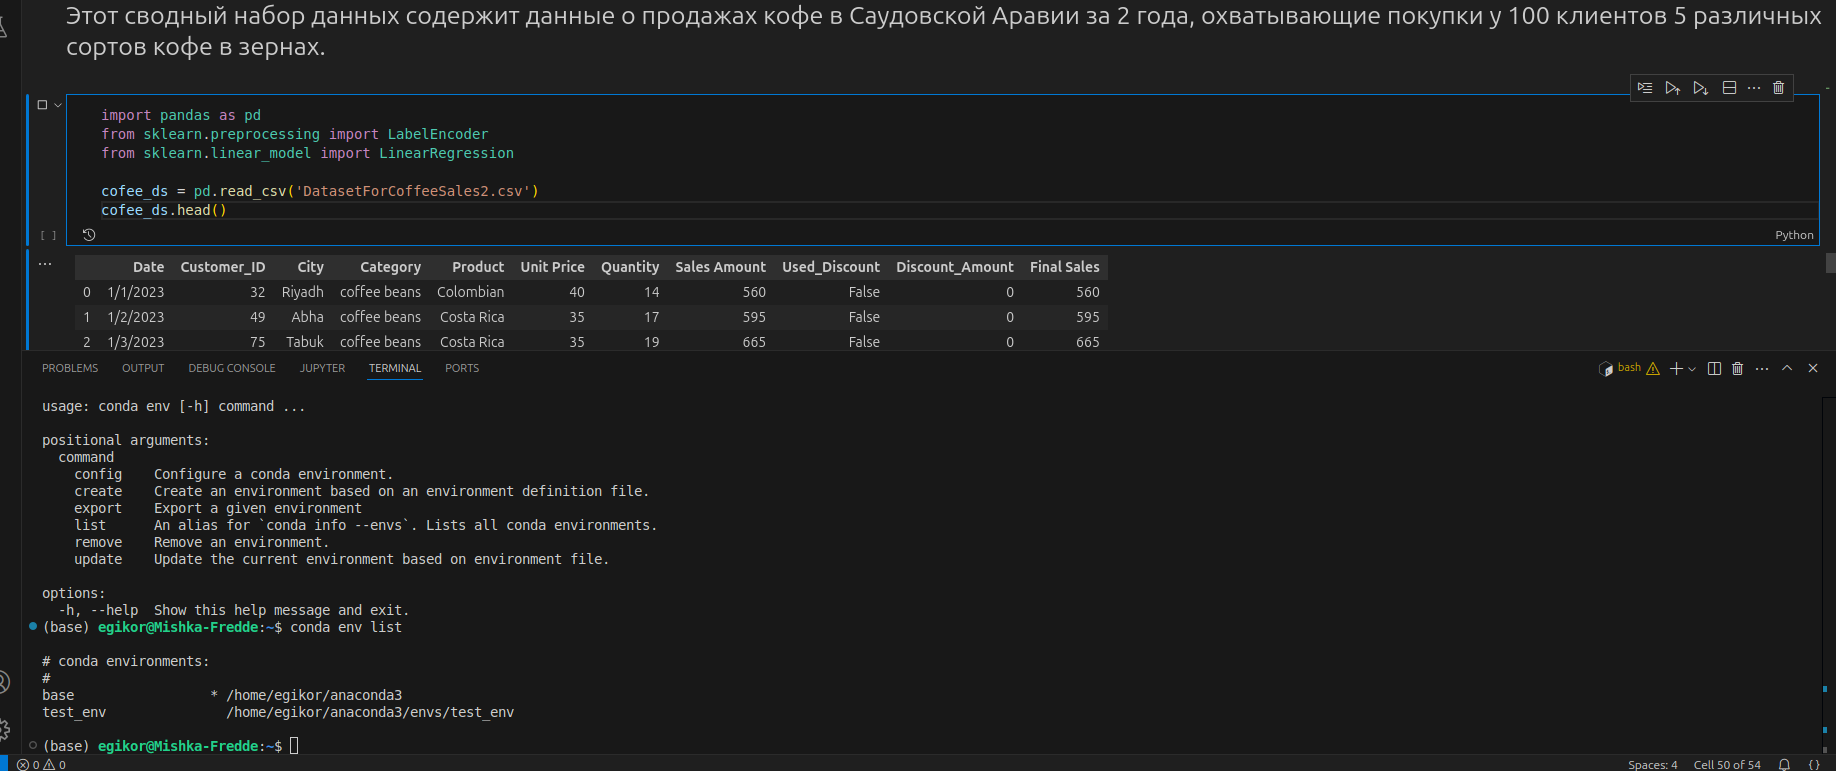

# Библиотеки
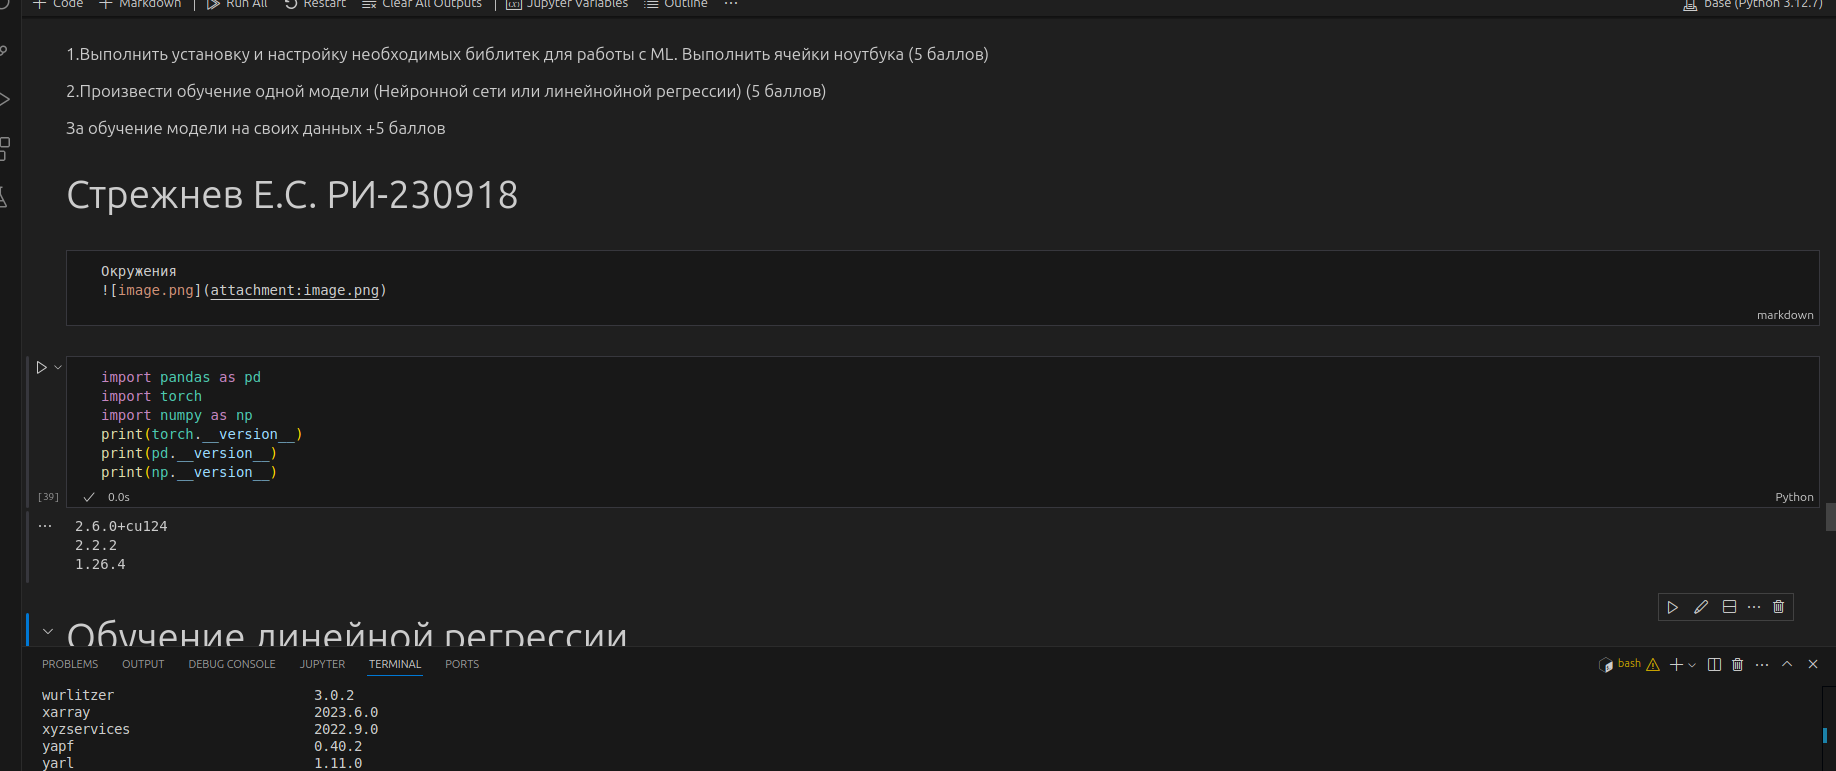

# Все библиотеки качал в базовое окружение, т.к. были проблемы

In [39]:
import pandas as pd
import torch
import numpy as np
print(torch.__version__)
print(pd.__version__)
print(np.__version__)

2.6.0+cu124
2.2.2
1.26.4


# Обучение линейной регрессии
## Обучение буду проводить на датасете продаж кофе (взял с Kaggle)
### Этот сводный набор данных содержит данные о продажах кофе в Саудовской Аравии за 2 года, охватывающие покупки у 100 клиентов 5 различных сортов кофе в зернах. 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

cofee_ds = pd.read_csv('DatasetForCoffeeSales2.csv')
cofee_ds.head()   

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472


<dl>
<dt> Описание колонок:
<dd>Date - Дата покупки</dd>
<dd>Customer_ID - Уникальный идентификатор клиента</dd>
<dd>City - Город</dd>
<dd>Category - Кофейные зерна</dd>
<dd>Product - Тип кофе</dd>
<dd>UnitPrice - Цена за единицу каждого продукта</dd>
<dd>Quantity - Количество приобретенных единиц</dd>
<dd>Sales Amount - Общий объем продаж</dd>
<dd>Used_Discount - Была ли применена скидка</dd>
<dd>Discount-Amount - Величина скидки</dd>
<dd>Final Sales - Цена после скидки</dd>
</dl>

### Для признаков подойдут
- Unit Price 
- Quantity 
- Used_Discount – бинарный признак (0/1)
- Discount_Amount 
- City – закодировать в числовой формат 
- Product – закодировать аналогично городу

In [ ]:
#Выделяем признаки
features = ["Unit Price", "Quantity", "Used_Discount", "Discount_Amount", "City", "Product"]
target = "Final Sales"

cofee_ds["Used_Discount"] = cofee_ds["Used_Discount"].astype(int)  # Преобразуем True/False в 1/0

# Label Encoding для City и Product
encoder_city = LabelEncoder()
encoder_product = LabelEncoder()
cofee_ds["City"] = encoder_city.fit_transform(cofee_ds["City"])
cofee_ds["Product"] = encoder_product.fit_transform(cofee_ds["Product"])

# Разделяем на train/test
X = cofee_ds[features]
y = cofee_ds[target]
model = LinearRegression()
model.fit(X, y)
cofee_ds["pred"] = model.predict(X)
cofee_ds

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales,pred
0,1/1/2023,32,8,coffee beans,1,40,14,560,0,0,560,611.642383
1,1/2/2023,49,0,coffee beans,2,35,17,595,0,0,595,583.799325
2,1/3/2023,75,9,coffee beans,2,35,19,665,0,0,665,665.930391
3,1/4/2023,80,0,coffee beans,3,45,1,45,0,0,45,264.002976
4,1/5/2023,78,3,coffee beans,1,40,46,1840,1,368,1472,1423.407551
...,...,...,...,...,...,...,...,...,...,...,...,...
725,12/26/2024,4,3,coffee beans,1,40,26,1040,0,0,1040,1035.980061
726,12/27/2024,63,6,coffee beans,1,40,10,400,0,0,400,465.942615
727,12/28/2024,39,0,coffee beans,2,35,47,1645,0,0,1645,1659.145366
728,12/29/2024,57,9,coffee beans,3,45,3,135,1,27,108,283.228234
